In [4]:
%matplotlib inline

import numpy as np
import scipy as sci
from scipy.stats import norm
import matplotlib as plt

'''
Markov chain that fits mean and standard deviation for a gaussian (normally distributed) sample
'''

# Produce synthetic data
mu = 3 # Mean
sd = 0.2 # SD
n = 1000 # Number of data points

data = np.random.normal(mu, sd, n)

'''
Set up MCMC (Markov Chain Monte Carlo)
'''

# Starting guess [mu, sd]
mu_guess = np.random.random()
sd_guess = np.random.random()

init_param = np.array([mu_guess, sd_guess])

# Proposal widths
w =[0.2, 0.2]

# Prior functions (prior beliefs in mu, sigma):
# That mu and sigma are between -10 and 10

# mu_prior_fun = sci.uniform(-10, 10) 
# uniform.rvs(size=n, loc = start, scale=width)
def mu_prior_fun(p):
    min_mu = -10
    max_mu = 10
    if (p > min_mu) and (p < max_mu):
        truth = 1
    else:
        truth = 0

    return truth/(max_mu-min_mu)

#sd_prior_fun = 
def sd_prior_fun(p):
    min_sd = 0.01
    max_sd = 10
    if (p > min_sd) and (p < max_sd):
        truth = 1
    else:
        truth = 0
            
    return truth/(max_sd-min_sd)

prior_funcs = [mu_prior_fun, sd_prior_fun]


# Number of iterations
n_iterates = 1000

# Define function to calculate log likelihood
def gaussian_ll(data, params): # params = [mu, sd]
    mu = params[0]
    sd = params[1]
        
    ll = 0
    for i in data:
        ll = ll + norm.logpdf(i, loc = mu, scale = sd)

    return ll

# Calculate log likelihood (ll) of initial guess
param = init_param
ll = gaussian_ll(data, param)

# Establish data store for chain
# Where first column = ll
# And second column and onwards = model parameters (in this case 2 = mu, 3 = sigma)

chain = np.zeros(shape = (n_iterates, len(param) + 1))
chain[0, 0] = ll
chain[0, 1:] = param

In [ ]:
# Run MCMC
prop_param = np.array([0, 0])

for i in range(n_iterates):
    if i % 10 == 0:
        print ('Iteration of ' + str(i) + '/' + str(n_iterates)) # Print status every ten iterations
    
    for j in range(len(param)): # Gibbs loop over number of parameters (i.e. j=1 is mu, j=2 is sd)
        # Propose a parameter value within prev. set widths
        prop_param = param.copy()

        if np.random.random() < 0.5: 
            sign = 1
        else:
            sign = -1 # randomly plus or minus width (faster than random.choice())
            
        prop_param[j] = prop_param[j] - (w[j]/2 * sign) 
        print ('prop_param = ' + str(prop_param))
        # Calculate log likelihood of proposal
        prop_ll = gaussian_ll(data, prop_param)
        
        # Accept or reject proposal
        prior_fun = prior_funcs[j] # Grab the correct prior function (mu or sd)
        
        # Likelihood ratio
        r = np.exp(prop_ll - ll) * prior_fun(prop_param[j]) / prior_fun(param[j])
        print ('r = ' + str(r))
        # Is likelihood ratio less than or equal to one
        alpha = min(1, r) 
        print ('alpha = ' + str(alpha))
        
        # Random number between 0 to 1
        # So will have weighted chance of possibly accepting depending on how likely the new parameter is
        test = np.random.uniform(0, 1)
        print ('test = '+ str(test))
        # Maybe accept
        if (test < alpha): 
            ll = prop_ll
            param = prop_param.copy()
        print ('param = ' + str(param))        
        # "Else" reject, though nothing to write
        
        # Store iterate
        chain[i, 0] = ll
        chain[i, 1:] = param
        
print(chain)

Iteration of 0/1000
prop_param = [0.46744975 0.54220568]
r = inf
alpha = 1
test = 0.7922974450380798
param = [0.46744975 0.54220568]
prop_param = [0.46744975 0.44220568]
r = 0.0
alpha = 0.0
test = 0.43532568961747764
param = [0.46744975 0.54220568]
prop_param = [0.36744975 0.54220568]
r = 0.0
alpha = 0.0
test = 0.4494377035723848
param = [0.46744975 0.54220568]
prop_param = [0.46744975 0.44220568]
r = 0.0
alpha = 0.0
test = 0.22743480579136377
param = [0.46744975 0.54220568]
prop_param = [0.56744975 0.54220568]
r = inf
alpha = 1
test = 0.9078027295481115
param = [0.56744975 0.54220568]
prop_param = [0.56744975 0.64220568]
r = inf
alpha = 1
test = 0.06911645076907724
param = [0.56744975 0.64220568]
prop_param = [0.66744975 0.64220568]
r = 1.6107384732586682e+252
alpha = 1
test = 0.3855174186211662
param = [0.66744975 0.64220568]
prop_param = [0.66744975 0.74220568]
r = inf
alpha = 1
test = 0.09693966938338217
param = [0.66744975 0.74220568]
prop_param = [0.76744975 0.74220568]
r = 8.711

r = 2.2337903158022972e-09
alpha = 2.2337903158022972e-09
test = 0.016097566905941774
param = [2.06744975 1.04220568]
prop_param = [2.16744975 1.04220568]
r = 6.143306145520293e+35
alpha = 1
test = 0.7392406045897241
param = [2.16744975 1.04220568]
prop_param = [2.16744975 0.94220568]
r = 17160140681.073158
alpha = 1
test = 0.36726926447863595
param = [2.16744975 0.94220568]
prop_param = [2.06744975 0.94220568]
r = 1.6282996021407413e-44
alpha = 1.6282996021407413e-44
test = 0.48403339342789
param = [2.16744975 0.94220568]
prop_param = [2.16744975 0.84220568]
r = 314.24852119133465
alpha = 1
test = 0.9071344524122567
param = [2.16744975 0.84220568]
prop_param = [2.26744975 0.84220568]
r = 4.800694510817466e+48
alpha = 1
test = 0.3114583904310131
param = [2.26744975 0.84220568]
prop_param = [2.26744975 0.74220568]
r = 554.2584366653989
alpha = 1
test = 0.7493478183639286
param = [2.26744975 0.74220568]
prop_param = [2.16744975 0.74220568]
r = 2.0747652194597642e-63
alpha = 2.07476521945

r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.8104331834693057
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.34220568]
r = 1.6332958963049364e-78
alpha = 1.6332958963049364e-78
test = 0.8450631361706987
param = [2.96744975 0.24220568]
Iteration of 60/1000
prop_param = [3.06744975 0.24220568]
r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.8298623069891294
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.23310632189730596
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.24329276673046518
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.8078354236827764
param = [2.96744975 0.24220568]
prop_param = [3.06744975 0.24220568]
r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 

r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.9749542393149777
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.5406003294934433
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.14433960443820093
param = [2.96744975 0.24220568]
prop_param = [3.06744975 0.24220568]
r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.16942495308191818
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.2573592062888339
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.06013724142164456
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.8360661082988331
param =

r = 1.6332958963049364e-78
alpha = 1.6332958963049364e-78
test = 0.8830626588219298
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.5896136890820097
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.28490058317905387
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.41268404615219645
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.34220568]
r = 1.6332958963049364e-78
alpha = 1.6332958963049364e-78
test = 0.15626737916716793
param = [2.96744975 0.24220568]
prop_param = [3.06744975 0.24220568]
r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.7184291753766335
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.9822652036829645
par

r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.9046132919663794
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.039328272286199506
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.34220568]
r = 1.6332958963049364e-78
alpha = 1.6332958963049364e-78
test = 0.09794440038448449
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.190091819262457
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.9271565615583031
param = [2.96744975 0.24220568]
prop_param = [3.06744975 0.24220568]
r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.540515859004851
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.020424542009230162
param

r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.5451934479969849
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.725310018228941
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.6773646348845164
param = [2.96744975 0.24220568]
Iteration of 170/1000
prop_param = [3.06744975 0.24220568]
r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.593034996206854
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.34220568]
r = 1.6332958963049364e-78
alpha = 1.6332958963049364e-78
test = 0.5764605369201957
param = [2.96744975 0.24220568]
prop_param = [3.06744975 0.24220568]
r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.5395458321590224
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.34220568]
r = 1.6332958963049364e-78
alpha = 1.6332958963049364e-78
test = 0.1

r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.018806255463918675
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.34220568]
r = 1.6332958963049364e-78
alpha = 1.6332958963049364e-78
test = 0.5013607709962017
param = [2.96744975 0.24220568]
prop_param = [3.06744975 0.24220568]
r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.05989607548637932
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.34220568]
r = 1.6332958963049364e-78
alpha = 1.6332958963049364e-78
test = 0.622036137200797
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.4737171494562188
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.37878381797529215
param = [2.96744975 0.24220568]
prop_param = [3.06744975 0.24220568]
r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.2192016645886273

r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.8516567488785732
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.6151496881217279
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.5406274396524892
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.43905077859174513
param = [2.96744975 0.24220568]
prop_param = [2.86744975 0.24220568]
r = 4.040104628059029e-71
alpha = 4.040104628059029e-71
test = 0.3983491549291245
param = [2.96744975 0.24220568]
prop_param = [2.96744975 0.14220568]
r = 6.477097244014678e-45
alpha = 6.477097244014678e-45
test = 0.3821797839132517
param = [2.96744975 0.24220568]
prop_param = [3.06744975 0.24220568]
r = 0.00023028060669956867
alpha = 0.00023028060669956867
test = 0.9676452269206518
param = [

mu = 3
sd = 0.2


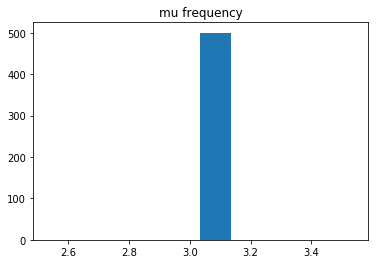

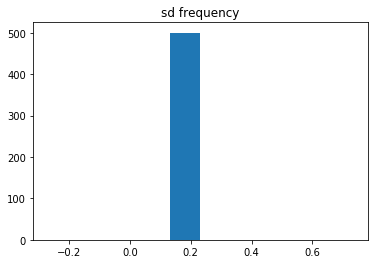

In [27]:
'''
Graphs
'''
import matplotlib.pyplot as plt

# Histograms
plt.figure()
plt.hist(chain[int(n_iterates/2):,1])
plt.title('mu frequency')
print('mu = ' + str(mu))

plt.figure()
plt.hist(chain[int(n_iterates/2):,2])
plt.title('sd frequency')
print('sd = ' + str(sd))

plt.show()

                ll        mu        sd
0   -161372.658460  0.635271  0.132265
1   -161372.658460  0.635271  0.132265
2   -148078.260708  0.735271  0.132265
3   -148078.260708  0.735271  0.132265
4   -135355.484583  0.835271  0.132265
5    -39770.030970  0.935271  0.232265
6    -19515.102904  0.935271  0.332265
7    -11718.561791  0.935271  0.432265
8     -7249.300022  1.035271  0.532265
9     -7249.300022  1.035271  0.532265
10    -7249.300022  1.035271  0.532265
11    -7249.300022  1.035271  0.532265
12    -5393.680136  1.035271  0.632265
13    -4911.956811  1.135271  0.632265
14    -4911.956811  1.135271  0.632265
15    -4911.956811  1.135271  0.632265
16    -4455.248537  1.235271  0.632265
17    -3263.675956  1.335271  0.732265
18    -2791.691868  1.335271  0.832265
19    -2300.609935  1.435271  0.932265
20    -2134.842093  1.435271  1.032265
21    -2134.842093  1.435271  1.032265
22    -2134.842093  1.435271  1.032265
23    -2027.378847  1.435271  1.132265
24    -2027.378847  1.435

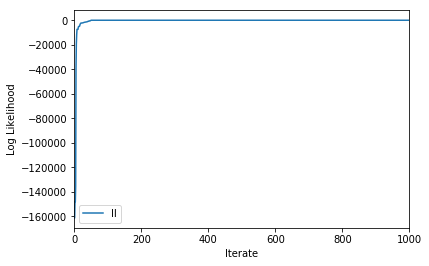

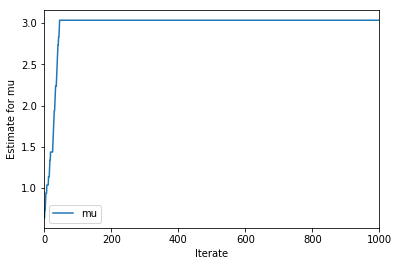

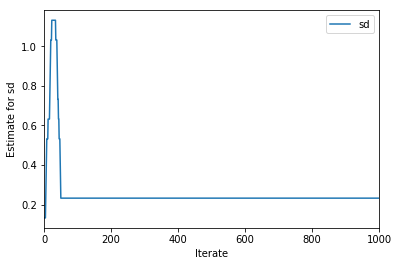

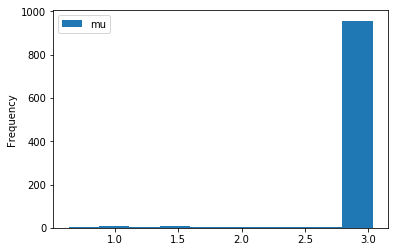

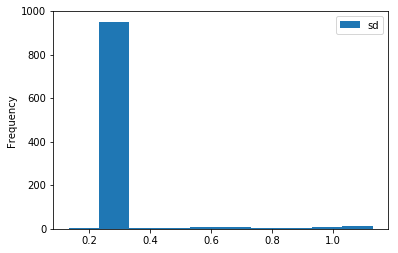

In [31]:
print(chain)
import pandas as pd
chain = pd.DataFrame(chain, columns=['ll', 'mu', 'sd']) # Change np to panda array

n = np.arange(1000) # Creates array of iterates

print(chain)

# Retrieve column as a size 1 array

chain.plot(kind='line', y = 'll')
plt.ylabel('Log Likelihood')
plt.xlabel('Iterate')

chain.plot(kind = 'line', y = 'mu')
plt.ylabel('Estimate for mu')
plt.xlabel('Iterate')

chain.plot(kind = 'line', y = 'sd')
plt.ylabel('Estimate for sd')
plt.xlabel('Iterate')

chain[['mu']].plot(kind = 'hist')
chain[['sd']].plot(kind = 'hist')

plt.show()

